 # Heart Disease Prediction using deep learning

1. Importing necessary dependencies

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'final.ipynb', 'heart.csv']


2. Importing and studying the dataset

In [19]:
dataset=pd.read_csv("heart.csv")

In [20]:
#verifying the dataset as a dataframe object

type(dataset)

pandas.core.frame.DataFrame

In [21]:
#shape of dataset

dataset.shape

(1025, 14)

In [22]:
#Getting and output of a few data columns

dataset.sample(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
17    54    1   0       124   266    0        0      109      1      2.2   
290   52    1   2       138   223    0        1      169      0      0.0   
679   68    1   2       180   274    1        0      150      1      1.6   
55    55    1   0       140   217    0        1      111      1      5.6   
557   48    1   0       122   222    0        0      186      0      0.0   

     slope  ca  thal  target  
17       1   1     3       0  
290      2   4     2       1  
679      1   0     3       0  
55       0   0     3       0  
557      2   0     2       1

In [23]:
dataset.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

In [24]:
#Description of the dataset

dataset.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [26]:
#Description of the coulumns 

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestrol in mg/dl","fasting blood sugar < 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+": "+info[i])

age: age
sex: 1: male, 0: female
cp: chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps: resting blood pressure
chol:  serum cholestrol in mg/dl
fbs: fasting blood sugar < 120 mg/dl
restecg: resting electrocardiographic results (values 0,1,2)
thalach:  maximum heart rate achieved
exang: exercise induced angina
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Studying the target variable

In [27]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [28]:
dataset["target"].unique()

array([0, 1], dtype=int64)

Studying the correlation between the factors

In [29]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


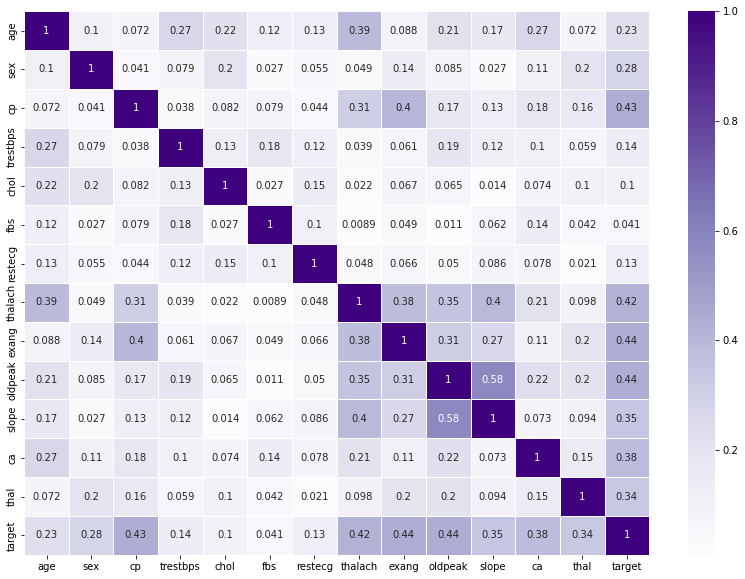

In [32]:
plt.figure(figsize = (14, 10)) 
sns.heatmap(dataset.corr().abs(), cmap='Purples',annot=True, linecolor='White', linewidths=1.0)
plt.show()

3. Exploratory Data Analysis (EDA)

1    526
0    499
Name: target, dtype: int64


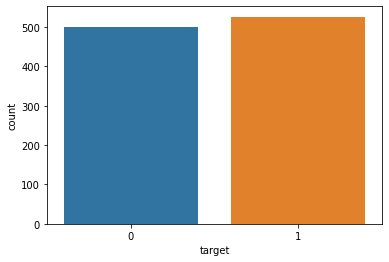

In [34]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

#The target values in our dataset are almost equal, so the algorithms have a better chance of giving accurate results

In [24]:
#Descrpition and plot of gender with respect to target value

dataset["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='count'>

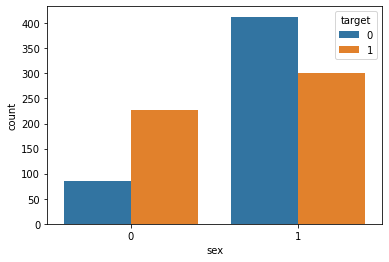

In [36]:
sns.countplot(data= dataset, x='sex',hue='target')

#The below graph shows that women are more prone to heart diseases as compared to men

In [26]:
#Descrpition and plot of types of chest pains with respect to target value

dataset["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

In [37]:
sns.countplot(data= dataset, x='cp',hue='target')

#The graph below illustrates how people with atypical angina are more at risk of heart problems followed by non-anginal chest pain

<AxesSubplot:xlabel='cp', ylabel='count'>

In [12]:
#Descrpition and plot of fasting blood sugar with respect to target value

dataset["fbs"].unique()

array([0, 1], dtype=int64)

In [38]:
sns.countplot(data= dataset, x='fbs',hue='target')

#the below graph shows that the people with fasting blood sugar levels above 120 mg/dl are more prone to heart diseases

<AxesSubplot:xlabel='fbs', ylabel='count'>

In [30]:
#Descrpition and plot of resting ECG results with respect to target value

dataset["restecg"].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='count'>

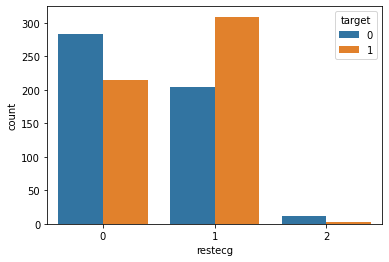

In [39]:
sns.countplot(data= dataset, x='restecg',hue='target')

# 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
# 1: normal
# 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#here we see that most of people studied had normal ECG results, values 0 and 2 shows abnormality

In [32]:
#Descrpition and plot of excercise induced angina results with respect to target value

dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='count'>

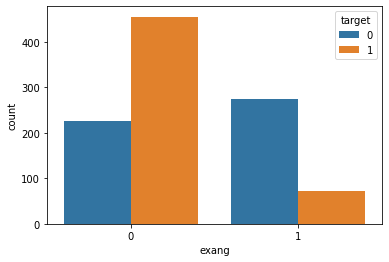

In [40]:
sns.countplot(data= dataset, x='exang',hue='target')

#here the outcomes are yes or no, most people did not show the symptoms of angina after or during a workout

In [14]:
#This factor shows the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping


dataset["slope"].unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='count'>

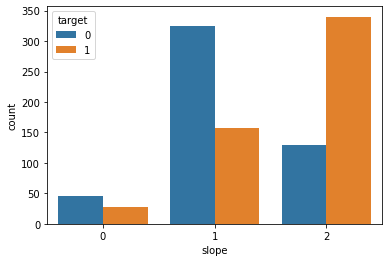

In [41]:
sns.countplot(data= dataset, x='slope',hue='target')

#A healthy heart should have an upslope in ST segment during excercise

In [36]:
#This factor shows the number of major vessels (0–4, Ordinal) colored by fluoroscopy

dataset["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [42]:
sns.countplot(data= dataset, x='ca',hue='target')

<AxesSubplot:xlabel='ca', ylabel='count'>

In [40]:
# A blood disorder called thalassemia 
# Value 0: NULL (dropped from the dataset previously
# Value 1: fixed defect (no blood flow in some part of the heart)
# Value 2: normal blood flow
# Value 3: reversible defect (a blood flow is observed but it is not normal)

dataset["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

In [43]:
sns.countplot(data= dataset, x='thal',hue='target')

#the plot below shows the different types of blood disorder distribution

<AxesSubplot:xlabel='thal', ylabel='count'>

4. Test-train split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report 

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

#Here we split the data to be used for testing and training all the models

In [43]:
X_train.shape

(820, 13)

In [44]:
X_test.shape

(205, 13)

In [45]:
Y_train.shape

(820,)

In [46]:
Y_test.shape

(205,)

Model fitting and using all the various models and studying them

In [7]:
from sklearn.metrics import accuracy_score

1. Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [12]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,3)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.341 %


2. Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [13]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,3)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.366 %
